In [76]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

In [78]:
def reverseSFit(x,y):
    def reverseS(x1, a, c, d):
        y1 = (1-c)/(1+np.exp(a*(2*x1/d-1)))+c
        return y1
    popt, pcov = curve_fit(reverseS, x, y)
    
    # popt
    a = popt[0] 
    c = popt[1]
    d = popt[2]
    yvals = reverseS(x,a,c,d) #拟合y值
    
    #print(pcov)
    
    return a,c,d,yvals

def gmpFit(x,y):
    def gmp(x1, alpha, n):
        y1 = 1-(1-x1**(-alpha))**n
        return y1
    popt, pcov = curve_fit(gmp, x, y)
    
    #popt
    alpha = popt[0]
    n = popt[1]
    yvals = gmp(x,alpha,n) #拟合y值
    
    #print(pcov)
    
    return alpha,n,yvals

In [79]:
def figParaRevers(dic,centerName):
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(3.5,2.625),dpi=200)

    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.tick_params("x",which = "major",direction = "in" ,
                                        length=3,width = 0.5,labelrotation=0,labelsize=6)
    ax.tick_params("x",which = "minor",direction = "in",
                            length=1.5,width = 0.5 ,labelsize=6)

    ax.set_xlim(0,31)
    ax.set_ylim(0,1)
    #ax.set_xticklabels(a,size=6)
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax.tick_params("y",which = "major",direction = "in",
                            length=3,width = 0.5 ,labelsize=6)
    ax.tick_params("y",which = "minor",direction = "in",
                            length=1.5,width = 0.5 ,labelsize=6)
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    label = [label.set_fontname('Times New Roman') for label in labels]

    font1 = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 6}

    ax.set_xlabel("Distance to the city center(km)",font1,size=7)
    ax.set_ylabel("Urban land density",font1,size=7)
    ax.set_title(centerName,font1,size=8)

    color = ["r","lawngreen","b","coral","g","lightskyblue","m","deeppink"]
    i=0
    acd = {}
    for year,data in dic.items():
        y = data.loc[:,"dens"]
        x = y.index+1
        ax.plot(x,y,".",c=color[i],ms = 2)
        a,c,d,yvals = reverseSFit(x,y)
        ax.plot(x,yvals,"--",lw=1,c=color[i],label = str(year))
        ax.legend(prop=font1,frameon=False,loc="lower left")
        i+=1
        
        acd[year]=np.round([a,c,d],4)

    return fig,acd

In [80]:
centerNames = ["Wuhan"]
file_x = "./_revers_5years"

In [81]:
for centerName in centerNames:
    df = pd.read_csv("dens_"+centerName+".csv", index_col="Unnamed: 0")
    dic = {}
    for year, group_data in df.groupby("year"):
        if len(group_data)>=3:
            dic[year] = group_data.reset_index(drop=True)
    fig,acd = figParaRevers(dic,centerName)
    figname = "Fig_"+centerName+ file_x +".png"
    fig.savefig(figname,bbox_inches="tight",dpi=1200,pad_inches=0)
    df_acd = pd.DataFrame(acd)
    df_acd
    acdname = "ACD_"+centerName+ file_x +".csv"
    df_acd.to_csv(acdname)

In [100]:
import datetime
datetime.datetime.now().strftime('%Y.%m.%d-%H:%M:%S') 

'2020.02.02-23:35:39'

d:\anaconda\envs\gee\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
d:\anaconda\envs\gee\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
d:\anaconda\envs\gee\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


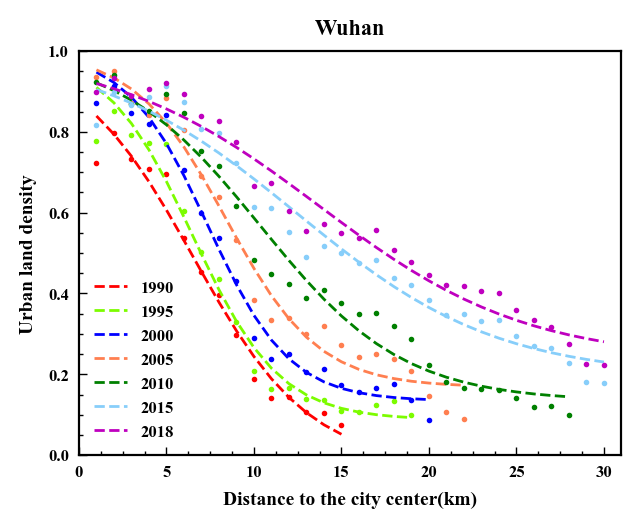

## fit

In [98]:
df = pd.read_csv("dens_Shanghai_4.csv",names = ["x","y"])
x = df.iloc[1:,0]+1
y = df.iloc[1:,1]

3.101270538114607 0.33291265172239237 44.406711516122
1.0765205362109684 29.27442041339936


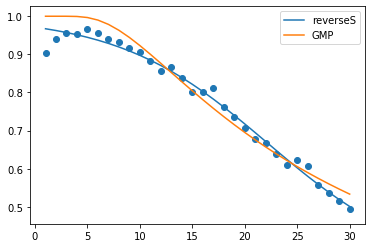

In [101]:
a,c,d,yvals = reverseSFit(x,y)
alpha,n,yvals2 = gmpFit(x,y)
print(a,c,d)
print(alpha,n)
plt.scatter(x,y)
plt.plot(x,yvals,label = "reverseS")
plt.plot(x,yvals2,label = "GMP")
plt.legend()

## plot

In [128]:
centerName = "Shanghai"
yDic = [34,29,24,19,14,9,4,1]
year_dic = {34:1985,33:1986,32:1987,31:1988,
            30:1989,29:1990,28:1991,27:1992,26:1993,25:1994,24:1995,23:1996,22:1997,21:1998,
            20:1999,19:2000,18:2001,17:2002,16:2003,15:2004,14:2005,13:2006,12:2007,11:2008,
            10:2009, 9:2010, 8:2011, 7:2012, 6:2013, 5:2014, 4:2015, 3:2016, 2:2017, 1:2018,} 

In [129]:
y = {}
for year in years:
    name = "dens_"+centerName +"_"+str(year)+".csv"
    df = pd.read_csv(name,names = ["x","y"])
    y[year_dic[year]]= df.iloc[1:,1]


In [130]:
df_n = pd.DataFrame(y)

[ 3.101  0.333 44.407]
[ 3.378  0.219 27.064]


D:\Anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


[ 3.347  0.107 19.178]
[ 2.595  0.069 12.813]


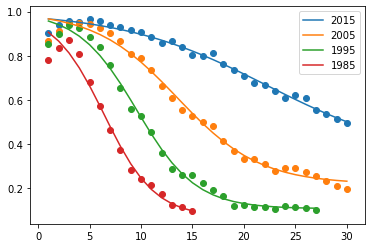

In [136]:
for i in range(df_n.shape[1]):
    y = df_n.iloc[:,i].dropna(axis=0,how='any')
    x = y.index
    plt.scatter(x,y)
    a,c,d,yvals = reverseSFit(x,y)
    plt.plot(x,yvals,label = str(df_n.columns[i]))
    plt.legend()
    print(np.round([a,c,d],3))

D:\Anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


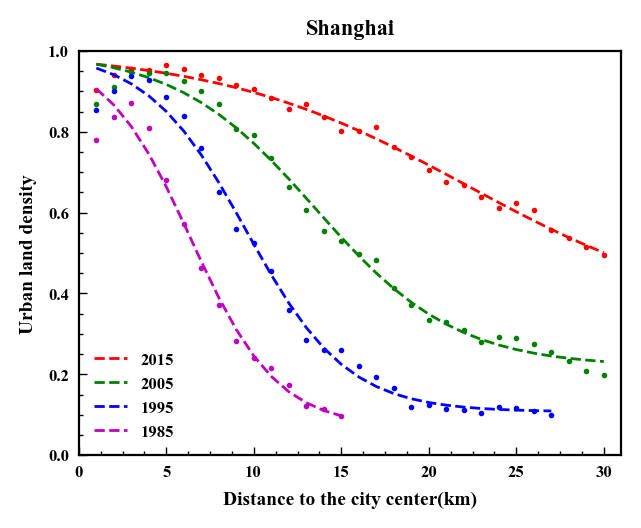

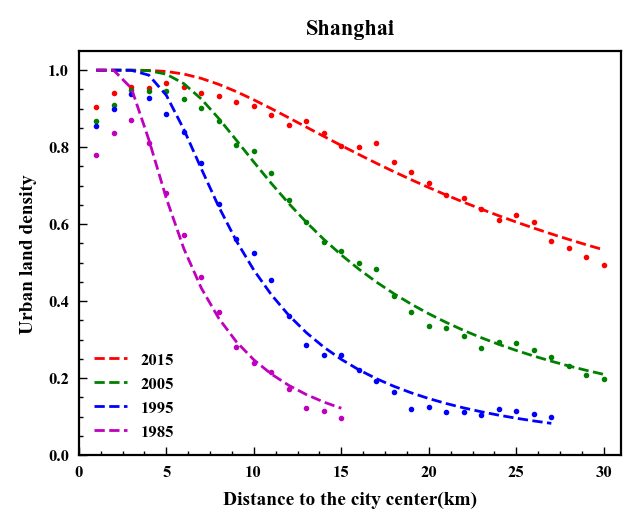

In [219]:
import matplotlib
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
plt.style.use('default')
fig, ax = plt.subplots(figsize=(3.5,2.625),dpi=200)

ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.tick_params("x",which = "major",direction = "in" ,
                                    length=3,width = 0.5,labelrotation=0,labelsize=6)
ax.tick_params("x",which = "minor",direction = "in",
                        length=1.5,width = 0.5 ,labelsize=6)

ax.set_xlim(0,31)
ax.set_ylim(0,1.05)
#ax.set_xticklabels(a,size=6)
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.tick_params("y",which = "major",direction = "in",
                        length=3,width = 0.5 ,labelsize=6)
ax.tick_params("y",which = "minor",direction = "in",
                        length=1.5,width = 0.5 ,labelsize=6)
labels = ax.get_xticklabels() + ax.get_yticklabels()
label = [label.set_fontname('Times New Roman') for label in labels]

font1 = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size'   : 6}

ax.set_xlabel("Distance to the city center(km)",font1,size=7)
ax.set_ylabel("Urban land density",font1,size=7)
ax.set_title("Shanghai",font1,size=8)

color = ["r","g","b","m"]
acd = {}
for i in range(df_n.shape[1]):
    y = df_n.iloc[:,i].dropna(axis=0,how='any')
    x = y.index
    ax.plot(x,y,".",c=color[i],ms = 2)
    alpha,n,yvals = gmpFit(x,y)
    ax.plot(x,yvals,"--",lw=1,c=color[i],label = str(df_n.columns[i]))
    ax.legend(prop=font1,frameon=False,loc="lower left")
    acd[df_n.columns[i]]=np.round([alpha,n],4)

In [214]:
df_acd = pd.DataFrame(acd)
df_acd.to_csv("Shanghai_acd.csv")